Links:

* http://www.esri.com/news/arcuser/0111/geodesic.html
* https://stackoverflow.com/a/38660915/554319
* https://stackoverflow.com/a/38707971/554319
* https://www.wikiwand.com/en/Mercator_projection#/Truncation_and_aspect_ratio
* https://www.wikiwand.com/en/Azimuthal_equidistant_projection
* https://github.com/jwass/geog
* https://shapely.readthedocs.io/en/latest/manual.html#shapely.ops.split

In [2]:
import telluric as tl
from telluric.constants import *
from telluric.plotting import map_from_element

from telluric.plotting import simple_plot

In [3]:
from telluric.util.antimeridian import *

In [3]:
gv_longer = tl.GeoVector.from_bounds(19_000_000, 0, 21_000_000, 50_000, WEB_MERCATOR_CRS)

In [4]:
print(gv_longer.buffer(1.0).envelope._shape)

POLYGON ((18999999 -1, 21000001 -1, 21000001 50001, 18999999 50001, 18999999 -1))


In [103]:
NP = GeoVector.point(0, 90)
SP = GeoVector.point(0, -90)

In [110]:
p_center = GeoVector.point(0, 80)

In [111]:
print(p_center._shape)

POINT (0 80)


In [112]:
aeqd_crs = azimuthal_from_geometry(p_center)
aeqd_crs

CRS({'units': 'm', 'proj': 'aeqd', 'ellps': 'WGS84', 'datum': 'WGS84', 'lat_0': 80.0, 'lon_0': 0.0})

In [113]:
print(NP.reproject(aeqd_crs)._shape)

POINT (0 1116825.85737585)


In [114]:
print(SP.reproject(aeqd_crs)._shape)

POINT (-2.313003341972836e-09 -18887105.60124959)


In [90]:
aeqd_crs

CRS({'units': 'm', 'proj': 'aeqd', 'ellps': 'WGS84', 'datum': 'WGS84', 'lat_0': 80.0, 'lon_0': 170.0})

/home/juanlu/Satellogic/telluric-team/telluric/telluric/plotting.py:157: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


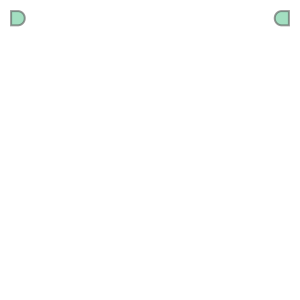

In [5]:
cut_by_antimeridian(gv_longer.buffer(1000000.0))

In [9]:
print(to_off)

POLYGON ((20037508.34278924 50000, 21000000 50000, 21000000 0, 20037508.34278924 0, 20037508.34278924 50000))


/home/juanlu/Satellogic/telluric-team/telluric/telluric/plotting.py:157: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


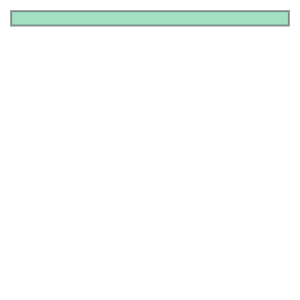

In [12]:
GeoVector(offset_shape(to_off), WEB_MERCATOR_CRS)

In [54]:
res = split(gv._shape, ANTIMERIDIAN._shape)

In [70]:
ANTIMERIDIAN_s = tl.GeoVector.line(((180, -89.999), (180, 89.999)))

In [71]:
print(ANTIMERIDIAN_s.get_shape(gv.crs))

LINESTRING (20037508.34278924 -74299743.40057556, 20037508.34278924 74299743.40061197)


/home/juanlu/Satellogic/telluric-team/telluric/telluric/plotting.py:157: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


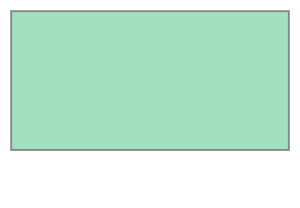

In [80]:
WORLD_BOUNDS

In [55]:
print(res)

GEOMETRYCOLLECTION (POLYGON ((19000000 0, 19000000 50000, 20000000 50000, 20000000 0, 19000000 0)))


In [61]:
gv_longer = tl.GeoVector.from_bounds(19_000_000, 0, 21_000_000, 50_000, WEB_MERCATOR_CRS)

In [72]:
res_l = split(gv_longer._shape, ANTIMERIDIAN_s.get_shape(WEB_MERCATOR_CRS))

In [73]:
print(res_l)

GEOMETRYCOLLECTION (POLYGON ((19000000 0, 19000000 50000, 20037508.34278924 50000, 20037508.34278924 0, 19000000 0)), POLYGON ((20037508.34278924 50000, 21000000 50000, 21000000 0, 20037508.34278924 0, 20037508.34278924 50000)))


In [77]:
print(res_l[0])

POLYGON ((19000000 0, 19000000 50000, 20037508.34278924 50000, 20037508.34278924 0, 19000000 0))


In [74]:
len(res_l)

2

In [128]:
MERCATOR_WIDTH

40075016.68557849

In [129]:
aeqd_equator = CRS({'units': 'm', 'proj': 'aeqd', 'ellps': 'WGS84', 'datum': 'WGS84', 'lat_0': 0, 'lon_0': 0})

In [166]:
print(tl.GeoVector.point(0, -90).reproject(aeqd_polar)._shape)

POINT (0 -20003931.45862726)


In [163]:
print(tl.GeoVector.point(180, 0).reproject(aeqd_equator)._shape)

POINT (0 20003931.45862545)


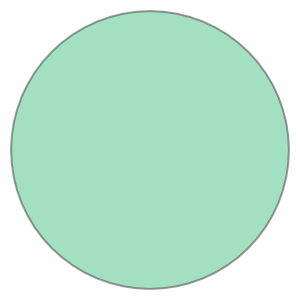

In [157]:
tl.GeoVector.point(0, 0, aeqd_equator).buffer(10_000_000)

In [127]:
print(WORLD_BOUNDS.buffer(0).reproject(aeqd_polar)._shape)

POLYGON ((-2.449761384549638e-09 20003819.76464771, -1.367856745493578e-14 111.6939795576923, 1.367856745493578e-14 111.6939795576923, 2.449761384549638e-09 20003819.76464771, -2.449761384549638e-09 20003819.76464771))


In [123]:
print(tl.GeoVector.point(0, 0, aeqd_polar).buffer(10000000000000)._shape)

POLYGON ((10000000000000 0, 9951847266721.969 -980171403295.6051, 9807852804032.305 -1950903220161.281, 9569403357322.09 -2902846772544.621, 9238795325112.869 -3826834323650.894, 8819212643483.553 -4713967368259.972, 8314696123025.456 -5555702330196.018, 7730104533627.374 -6343932841636.449, 7071067811865.481 -7071067811865.469, 6343932841636.463 -7730104533627.363, 5555702330196.03 -8314696123025.447, 4713967368259.986 -8819212643483.545, 3826834323650.908 -9238795325112.863, 2902846772544.636 -9569403357322.084, 1950903220161.296 -9807852804032.303, 980171403295.6208 -9951847266721.967, 0.01615544574432587 -10000000000000, -980171403295.5889 -9951847266721.971, -1950903220161.265 -9807852804032.309, -2902846772544.605 -9569403357322.094, -3826834323650.878 -9238795325112.875, -4713967368259.957 -8819212643483.561, -5555702330196.005 -8314696123025.464, -6343932841636.439 -7730104533627.382, -7071067811865.463 -7071067811865.488, -7730104533627.358 -6343932841636.468, -8314696123025.4

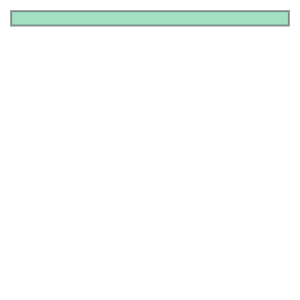

In [79]:
tl.GeoVector(res_l[1], WEB_MERCATOR_CRS)

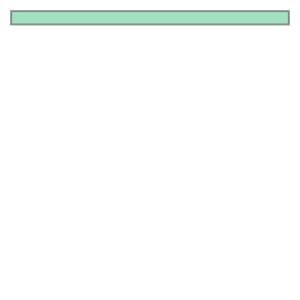

In [78]:
tl.GeoVector(res_l[0], WEB_MERCATOR_CRS)

/home/juanlu/Satellogic/telluric-team/telluric/telluric/plotting.py:157: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


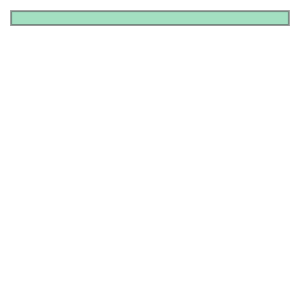

In [56]:
tl.GeoVector(res, WEB_MERCATOR_CRS)

In [53]:
len(_)

1

In [12]:
gv = tl.GeoVector.from_bounds(19_000_000, 0, 20_000_000, 50_000, WEB_MERCATOR_CRS)
gv.plot()

Map(basemap={'url': 'http://stamen-tiles-a.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png', 'attribution': 'Map tile…

In [34]:
print(tl.GeoVector.from_bounds(19_000_000, 0, 21_000_000, 50_000, WEB_MERCATOR_CRS).reproject(WGS84_CRS)._shape)

POLYGON ((170.6799039827091 0, 170.6799039827091 0.4491530416852091, -171.3537903349005 0.4491530416852091, -171.3537903349005 0, 170.6799039827091 0))


In [32]:
tl.GeoVector.from_bounds(19_000_000, 0, 21_000_000, 50_000, WEB_MERCATOR_CRS).plot()

Map(basemap={'url': 'http://stamen-tiles-a.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png', 'attribution': 'Map tile…

In [31]:
tl.GeoVector.from_bounds(19_000_000, 0, 20_000_000, 50_000, WEB_MERCATOR_CRS).plot()

Map(basemap={'url': 'http://stamen-tiles-a.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png', 'attribution': 'Map tile…

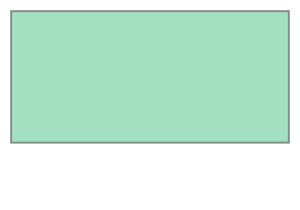

In [30]:
tl.GeoVector.from_bounds(-190, -90, 190, 90)

In [5]:
p_off = tl.GeoVector.point(170, 80)

In [15]:
from telluric.vectors import WORLD_BOUNDS

In [6]:
from telluric.util.projections import azimuthal_from_geometry

In [9]:
aeqd_crs = azimuthal_from_geometry(p_off)
aeqd_crs

CRS({'units': 'm', 'proj': 'aeqd', 'ellps': 'WGS84', 'datum': 'WGS84', 'lat_0': 80.0, 'lon_0': 170.0})

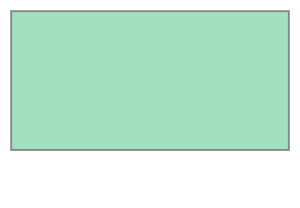

In [25]:
WORLD_BOUNDS._shape

In [38]:
WORLD_BOUNDS = GeoVector.from_bounds(-180, -89.999, 180, 89.999)
list(WORLD_BOUNDS.exterior.coords)

[(-180.0, -89.999),
 (-180.0, 89.999),
 (180.0, 89.999),
 (180.0, -89.999),
 (-180.0, -89.999)]

In [65]:

WORLD_BOUNDS_DENSE = GeoVector.polygon(((-180.0, -89.999),
 (-180.0, 0),
 (-180.0, 89.999),
 (0, 89.999),
 (180.0, 89.999),
 (180.0, 0),
 (180.0, -89.999),
 (-180.0, -89.999)))

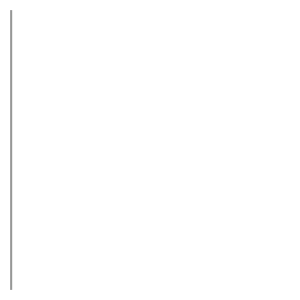

In [57]:

GeoVector.polygon(((-180.0, -89.999),
 (-180.0, 0),
 (-180.0, 89.999),
 (0, 89.999),
 (180.0, 89.999),
 (180.0, 0),
 (180.0, -89.999),
 (-180.0, -89.999))).buffer(-1).reproject(aeqd_crs_world)._shape

In [59]:
from rasterio.crs import CRS

In [61]:
aeqd_polar = CRS({'units': 'm', 'proj': 'aeqd', 'ellps': 'WGS84', 'datum': 'WGS84', 'lat_0': 90, 'lon_0': 0})

In [78]:
from functools import partial

import numpy as np

import pyproj
from shapely.ops import transform as sh_transform
from shapely.geometry import Point

wgs84_globe = pyproj.Proj(proj='latlong', ellps='WGS84')

def disk_on_globe(lat, lon, radius):
    """Generate a shapely.Polygon object representing a disk on the
    surface of the Earth, containing all points within RADIUS meters
    of latitude/longitude LAT/LON."""

    aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84',
                       lat_0=lat, lon_0=lon)
    disk = sh_transform(
        partial(pyproj.transform, aeqd, wgs84_globe),
        Point(0, 0).buffer(radius)
    )

    # Fix up segments that cross the coordinate singularity at longitude ±180.
    # We do this unconditionally because it may or may not create a non-simple
    # polygon, depending on where the initial point was.
    boundary = np.array(disk.boundary)
    i = 0
    while i < boundary.shape[0] - 1:
        if abs(boundary[i+1,0] - boundary[i,0]) > 180:
            assert (boundary[i,1] > 0) == (boundary[i,1] > 0)
            vsign = -1 if boundary[i,1] < 0 else 1
            hsign = -1 if boundary[i,0] < 0 else 1
            boundary = np.insert(boundary, i+1, [
                [hsign*179, boundary[i,1]],
                [hsign*179, vsign*89],
                [-hsign*179, vsign*89],
                [-hsign*179, boundary[i+1,1]]
            ], axis=0)
            i += 5
        else:
            i += 1
    disk = Polygon(boundary)

    # If the fixed-up polygon doesn't contain the origin point, invert it.
    if not disk.contains(Point(lon, lat)):
        disk = Box(-180, -90, 180, 90).difference(disk)

    assert disk.is_valid
    assert disk.boundary.is_simple
    assert disk.contains(Point(lon, lat))
    return disk

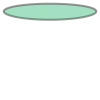

In [89]:
disk_on_globe(p_off.y, p_off.x, 100_000)

In [66]:
print(WORLD_BOUNDS_DENSE.buffer(-1).reproject(aeqd_polar)._shape)

POLYGON ((-347165.4661097763 19889096.23295388, -1951.27604974681 111788.530021015, 1951.27604974681 111788.530021015, 347165.4661097763 19889096.23295388, -347165.4661097763 19889096.23295388))


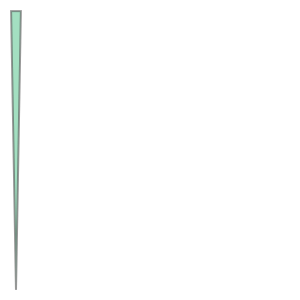

In [67]:
WORLD_BOUNDS_DENSE.buffer(-1).reproject(aeqd_polar)._shape

In [63]:
print(WORLD_BOUNDS.buffer(-1).reproject(aeqd_polar)._shape)

POLYGON ((-347165.4661097763 19889096.23295388, -1951.27604974681 111788.530021015, 1951.27604974681 111788.530021015, 347165.4661097763 19889096.23295388, -347165.4661097763 19889096.23295388))


In [58]:
aeqd_crs_world = azimuthal_from_geometry(WORLD_BOUNDS)
aeqd_crs_world

CRS({'units': 'm', 'proj': 'aeqd', 'ellps': 'WGS84', 'datum': 'WGS84', 'lat_0': -0.0, 'lon_0': -0.0})

In [54]:
print(WORLD_BOUNDS.buffer(0).reproject(aeqd_crs_world)._shape)

POLYGON ((-1.22490121012589e-09 -10002077.42329228, 0 10002077.42329228, 0 10002077.42329228, -1.22490121012589e-09 -10002077.42329228, -1.22490121012589e-09 -10002077.42329228))


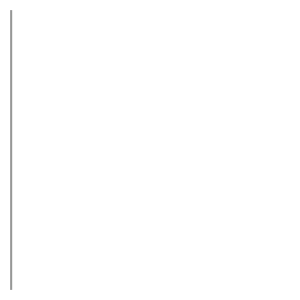

In [55]:
WORLD_BOUNDS.buffer(-1).reproject(aeqd_crs_world)._shape

In [14]:
print(p_off.reproject(aeqd_crs).buffer(100_000)._shape)

POLYGON ((100000 0, 99518.4726672197 -9801.71403295605, 98078.52804032306 -19509.03220161281, 95694.03357322089 -29028.46772544621, 92387.9532511287 -38268.34323650894, 88192.12643483553 -47139.67368259972, 83146.96123025456 -55557.02330196017, 77301.04533627375 -63439.32841636449, 70710.67811865482 -70710.67811865469, 63439.32841636462 -77301.04533627363, 55557.0233019603 -83146.96123025447, 47139.67368259986 -88192.12643483545, 38268.34323650908 -92387.95325112862, 29028.46772544636 -95694.03357322085, 19509.03220161296 -98078.52804032303, 9801.714032956208 -99518.47266721967, 1.615544574432587e-10 -100000, -9801.714032955888 -99518.4726672197, -19509.03220161265 -98078.52804032307, -29028.46772544605 -95694.03357322094, -38268.34323650879 -92387.95325112875, -47139.67368259957 -88192.12643483561, -55557.02330196005 -83146.96123025463, -63439.32841636439 -77301.04533627382, -70710.67811865463 -70710.67811865488, -77301.04533627359 -63439.32841636468, -83146.96123025444 -55557.0233019

In [7]:
p_off.buffer(100_000, geodesic=True)._shape

In [8]:
print(_)

GEOMETRYCOLLECTION EMPTY


In [9]:
p_off.buffer(100_000_0, geodesic=True)._shape

In [23]:
def foo():
    import pdb; pdb.set_trace()
    res = cut_by_antimeridian(p_off.buffer(1_000_000, geodesic=True))
    return res

foo()

> <ipython-input-23-80e881ecc241>(3)foo()
-> res = cut_by_antimeridian(p_off.buffer(1_000_000, geodesic=True))
(Pdb) s
--Call--
> /home/juanlu/Satellogic/telluric-team/telluric/telluric/vectors.py(435)buffer()
-> def buffer(self, *args, geodesic=False, **kwargs):
(Pdb) r
--Return--
> /home/juanlu/Satellogic/telluric-team/telluric/telluric/vectors.py(452)buffer()->GeoVector(sha...4326 +no_defs)
-> return self.reproject(aeqd_crs).buffer(*args, **kwargs).reproject(self.crs)
(Pdb) s
--Call--
> /home/juanlu/Satellogic/telluric-team/telluric/telluric/util/antimeridian.py(24)cut_by_antimeridian()
-> def cut_by_antimeridian(geometry):
(Pdb) n
> /home/juanlu/Satellogic/telluric-team/telluric/telluric/util/antimeridian.py(26)cut_by_antimeridian()
-> crs = geometry.crs
(Pdb) 
> /home/juanlu/Satellogic/telluric-team/telluric/telluric/util/antimeridian.py(27)cut_by_antimeridian()
-> shapes_col = split(geometry.get_shape(crs), ANTIMERIDIAN.get_shape(crs))
(Pdb) s
--Call--
> /home/juanlu/Satellogic/t

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 161.79646591154537 71.255008644190397 at 161.79646591154537 71.255008644190397


*** ValueError: No Shapely geometry can be created from null value
(Pdb) !geom.is_valid
False
(Pdb) !splitter.is_valid
True
(Pdb) 
'Split a Polygon with a LineString'
(Pdb) u
> /home/juanlu/Satellogic/telluric-team/telluric/telluric/util/antimeridian.py(27)cut_by_antimeridian()
-> shapes_col = split(geometry.get_shape(crs), ANTIMERIDIAN.get_shape(crs))
(Pdb) u
> <ipython-input-23-80e881ecc241>(3)foo()
-> res = cut_by_antimeridian(p_off.buffer(1_000_000, geodesic=True))
(Pdb) u
> <ipython-input-23-80e881ecc241>(6)<module>()
-> foo()
(Pdb) u
> /home/juanlu/.miniconda36/envs/tp36/lib/python3.6/site-packages/IPython/core/interactiveshell.py(3265)run_code()
-> exec(code_obj, self.user_global_ns, self.user_ns)
(Pdb) d
> <ipython-input-23-80e881ecc241>(6)<module>()
-> foo()
(Pdb) d
> <ipython-input-23-80e881ecc241>(3)foo()
-> res = cut_by_antimeridian(p_off.buffer(1_000_000, geodesic=True))
(Pdb) d
> /home/juanlu/Satellogic/telluric-team/telluric/telluric/util/antimeridian.py(27)cut_by_antime

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 161.79646591154537 71.255008644190397 at 161.79646591154537 71.255008644190397


*** shapely.errors.TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x7fd1d3123ba8>
(Pdb) p p_off.buffer(100_000_0, geodesic=True)._shape
(Pdb) p p_off.buffer(100_000_0, geodesic=True).exterior
GeoVector(shape=LINEARRING (-147.7808054444246 76.60653909439564, -150.298266634011 75.96594808774422, -152.8446556226421 75.3585538256206, -155.4157115760171 74.78591560226793, -158.0079491290955 74.24950566735154, -160.6184642559477 73.75070623083732, -163.2447928470328 73.29080610270988, -165.8848061324606 72.87099715447791, -168.5366323177415 72.49237074227352, -171.1985971558741 72.15591420070814, -173.8691783787867 71.86250749582635, -176.5469703768952 71.61292011052529, -179.2306565069546 71.40780822427131, 178.0810129131596 71.24771223935899, 175.3892383963262 71.13305469741685, 172.6951860154184 71.06413862181142, 170 71.04114631372477, 167.3048139845817 71.06413862181142, 

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 161.79646591154537 71.255008644190397 at 161.79646591154537 71.255008644190397


ValueError: No Shapely geometry can be created from null value

In [22]:
%debug

> /home/juanlu/.miniconda36/envs/tp36/lib/python3.6/site-packages/shapely/geometry/base.py(76)geom_factory()
     74     # Abstract geometry factory for use with topological methods below
     75     if not g:
---> 76         raise ValueError("No Shapely geometry can be created from null value")
     77     ob = BaseGeometry()
     78     geom_type = geometry_type_name(g)

ipdb> u
> /home/juanlu/.miniconda36/envs/tp36/lib/python3.6/site-packages/shapely/geometry/base.py(476)representative_point()
    474     def representative_point(self):
    475         """Returns a point guaranteed to be within the object, cheaply."""
--> 476         return geom_factory(self.impl['representative_point'](self))
    477 
    478     @property

ipdb> u
> /home/juanlu/.miniconda36/envs/tp36/lib/python3.6/site-packages/shapely/impl.py(41)wrapper()
     39             raise ImplementationError(
     40                 "Method '%s' not provided by registered "
---> 41                 "implementation '%s'" 

In [20]:
cut_by_antimeridian(p_off.buffer(1_000_000, geodesic=True)).plot()

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 161.79646591154537 71.255008644190397 at 161.79646591154537 71.255008644190397


ValueError: No Shapely geometry can be created from null value

In [13]:
p_center = tl.GeoVector.point(0, 80)
p_center.plot()

Map(basemap={'url': 'http://stamen-tiles-a.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png', 'attribution': 'Map tile…

In [15]:
p_center.buffer(1_000_000, geodesic=True).plot()

Map(basemap={'url': 'http://stamen-tiles-a.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png', 'attribution': 'Map tile…

In [20]:
simple_plot(p_center.buffer(2_000_000, geodesic=True), crs='EPSG3857')

In [13]:
simple_plot(p_center.buffer(1000000, geodesic=True), crs='EPSG4326')

In [8]:
from ipyleaflet import leaflet

In [3]:
map_from_element(p_center)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [4]:
p_center.plot?

In [3]:
p_center.buffer(20).plot()

ArgumentError: argument 6: <class 'TypeError'>: wrong type

In [6]:
p_center.reproject(WEB_MERCATOR_CRS).buffer(1000000).plot()

Map(basemap={'url': 'http://stamen-tiles-a.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png', 'attribution': 'Map tile…

In [7]:
p_center.buffer(1000000, geodesic=True)

TypeError: buffer() got an unexpected keyword argument 'geodesic'

In [8]:
%debug

> /home/juanlu/.miniconda36/envs/tp36/lib/python3.6/site-packages/telluric/vectors.py(245)delegated_operation_special()
    243             def delegated_operation_special(self_, *args, **kwargs):
    244                 return self_.__class__(
--> 245                     getattr(self_.get_shape(self_.crs), item)(*args, **kwargs),
    246                     self_.crs
    247                 )

ipdb> p GEOM_UNARY_OPERATIONS
['buffer', 'simplify']
ipdb> q
